<a href="https://colab.research.google.com/github/pennyorengo/Python-Matplotlib/blob/main/Visualizing_data_with_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:

import pandas as pd

# Load data from a text file
df_students = pd.read_csv('https://raw.githubusercontent.com/pennyorengo/Python-Matplotlib/main/grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,70,True
1,Joann,13.50,40,False
2,Pedro,8.00,46,False
3,Rosie,14.00,92,True
4,Ethan,9.45,59,False
5,Vicky,2.00,6,False
6,Frederic,14.50,43,False
7,Jimmie,9.00,42,False
8,Rhonda,8.50,26,False
9,Giovanni,14.50,74,True


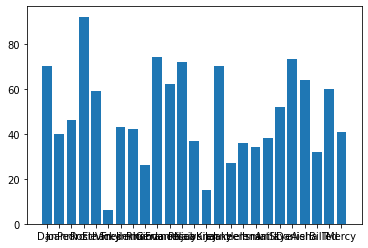

In [30]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade)

# Display the plot
plt.show()

Well, that worked; but the chart could use some improvements to make it clearer what we're looking at.

Note that you used the pyplot class from Matplotlib to plot the chart. This class provides a whole bunch of ways to improve the visual elements of the plot. For example, the following code:

Specifies the color of the bar chart.

Adds a title to the chart (so we know what it represents)

Adds labels to the X and Y (so we know which axis shows which data)

Adds a grid (to make it easier to determine the values for the bars)

Rotates the X markers (so we can read them)

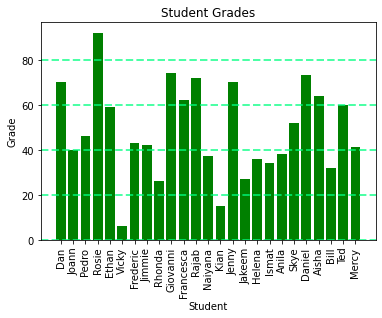

In [31]:
# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='green')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#00ff80', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

A plot is technically contained with a Figure. In the previous examples, the figure was created implicitly for you; but you can create it explicitly. 
For example, the following code creates a figure with a specific size.

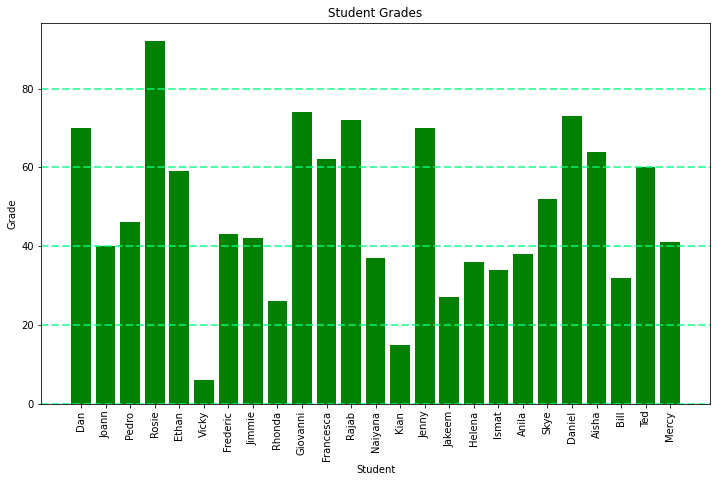

In [32]:
# Create a Figure
fig = plt.figure(figsize=(12,7))

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='green')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#00ff80', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

A figure can contain multiple subplots, each on its own axis.

For example, the following code creates a figure with two subplots - one is a bar chart showing student grades, and the other is a pie chart comparing the number of passing grades to non-passing grades.

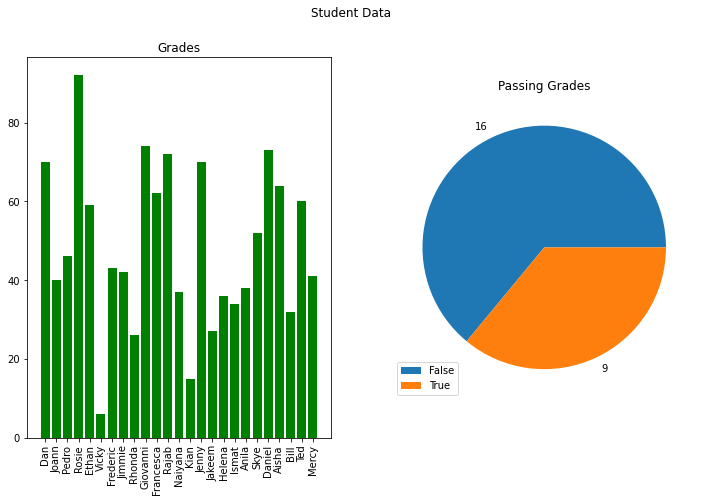

In [33]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (12,7))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='green')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
fig.show()

Until now, you've used methods of the Matplotlib.pyplot object to plot charts. However, Matplotlib is so foundational to graphics in Python that many packages, including Pandas, provide methods that abstract the underlying Matplotlib functions and simplify plotting. For example, the DataFrame provides its own methods for plotting data, as shown in the following example to plot a bar chart of study hours.

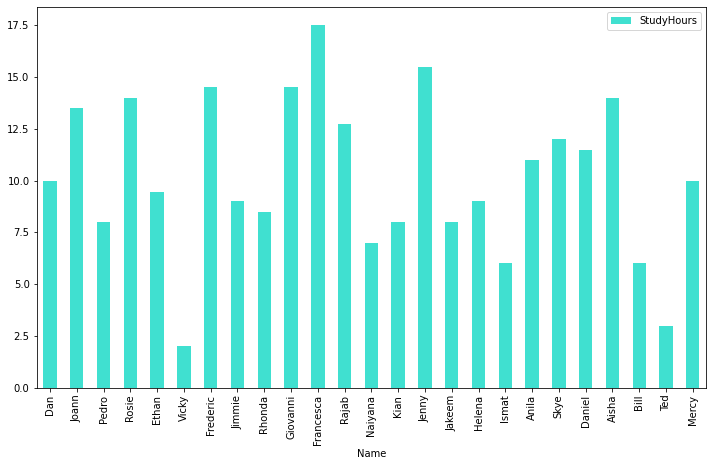

In [35]:
df_students.plot.bar(x='Name', y='StudyHours', color='turquoise', figsize=(12,7))

**Descriptive statistics and data distribution**

When examining a variable (for example a sample of student grades), data scientists are particularly interested in its distribution (in other words, how are all the different grade values spread across the sample). The starting point for this exploration is often to visualize the data as a histogram, and see how frequently each value for the variable occurs.

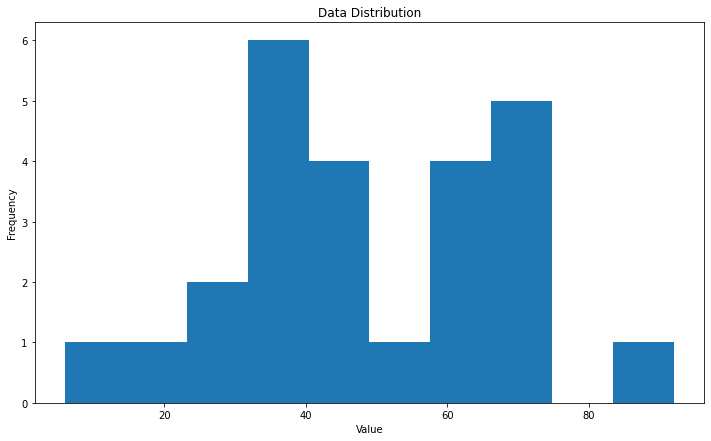

In [37]:
# Get the variable to examine
var_data = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(12,7))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

**Measures of central tendency**

To understand the distribution better, we can examine so-called measures of central tendency; which is a fancy way of describing statistics that represent the "middle" of the data. The goal of this is to try to find a "typical" value. Common ways to define the middle of the data include:

The mean: A simple average based on adding together all of the values in the sample set, and then dividing the total by the number of samples.
The median: The value in the middle of the range of all of the sample values.
The mode: The most commonly occuring value in the sample set*.
Let's calculate these values, along with the minimum and maximum values for comparison, and show them on the histogram.

Minimum:6.00
Mean:48.44
Median:43.00
Mode:70.00
Maximum:92.00



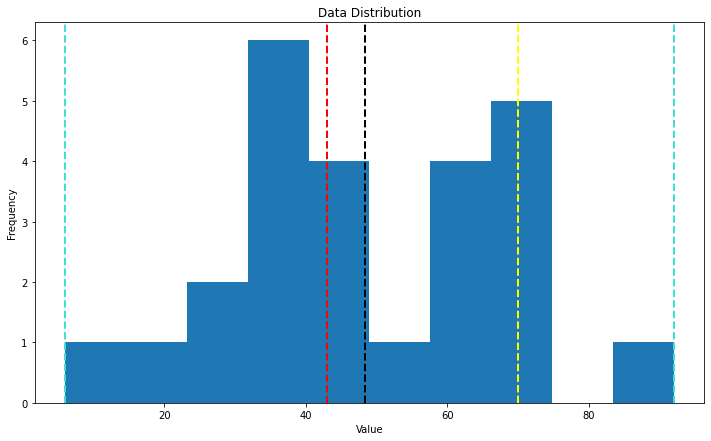

In [41]:
# Get the variable to examine
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(12,7))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'turquoise', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'black', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'turquoise', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()


Another way to visualize the distribution of a variable is to use a box plot (sometimes called a box-and-whiskers plot). Let's create one for the grade data.

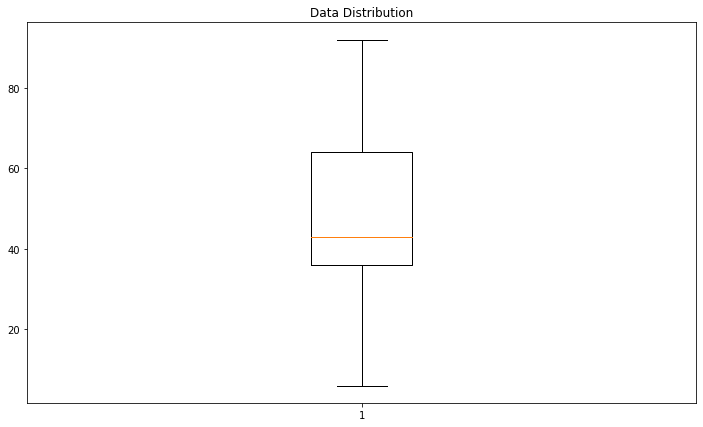

In [42]:
# Get the variable to examine
var = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(12,7))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

For learning, it can be useful to combine histograms and box plots, with the box plot's orientation changed to align it with the histogram (in some ways, it can be helpful to think of the histogram as a "front elevation" view of the distribution, and the box plot as a "plan" view of the distribution from above.)

Minimum:6.00
Mean:48.44
Median:43.00
Mode:70.00
Maximum:92.00



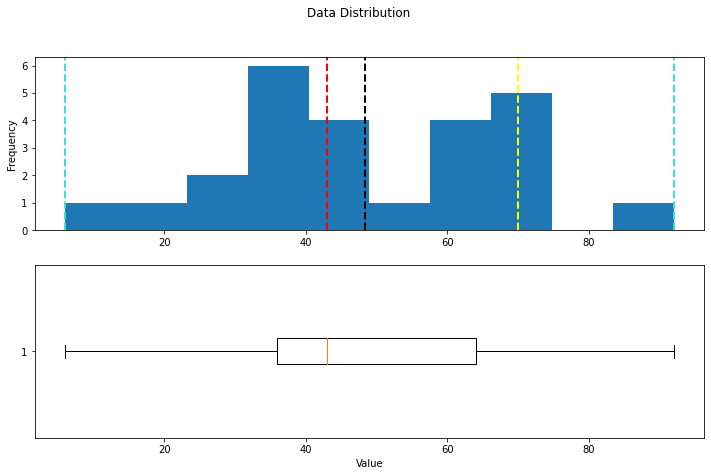

In [44]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (12,7))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'turquoise', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'black', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'turquoise', linestyle='dashed', linewidth = 2)

     # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)

To explore this distribution in more detail, you need to understand that statistics is fundamentally about taking samples of data and using probability functions to extrapolate information about the full population of data.

What does this mean? Samples refer to the data we have on hand - such as information about these 22 students' study habits and grades. The population refers to all possible data we could collect - such as every student's grades and study habits across every educational institution throughout the history of time. Usually we're interested in the population but it's simply not practical to collect all of that data. Instead, we need to try estimate what the population is like from the small amount of data (samples) that we have.

If we have enough samples, we can calculate something called a probability density function, which estimates the distribution of grades for the full population.

The pyplot class from Matplotlib provides a helpful plot function to show this density.

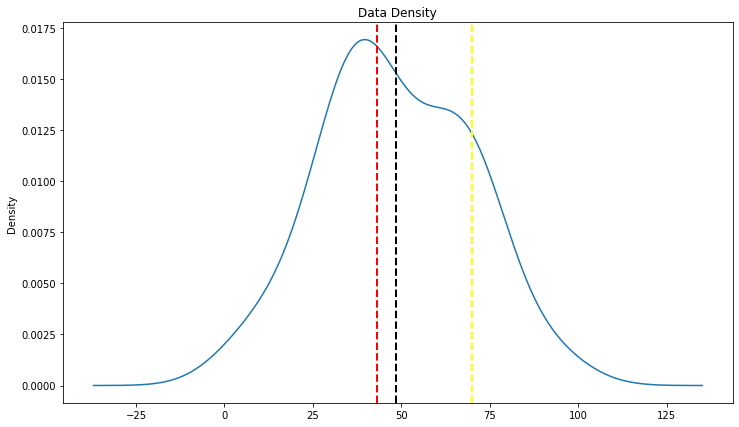

In [45]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(12,7))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'black', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = df_students['Grade']
show_density(col)